# Part 1: Understanding Product Categories

1. Most popular products
2. Compare terms + frequency list/table
3. Top 5 products
4. Bar chart products
5. Pie chart top 1 product

In [1]:
# Confirm where your notebook is running
import os
os.getcwd()


'C:\\Users\\famil\\Desktop\\Ironhack\\week5\\day1\\lab\\lab-eda-univariate'

In [2]:
# Check what files Python sees in that folder
os.listdir()


['.git',
 '.ipynb_checkpoints',
 'amz_uk_price_prediction_dataset.csv',
 'archive.zip',
 'lab_eda_univariate_analysis.ipynb',
 'README.md']

In [3]:
# Step 0 - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0 - Load dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Quick preview
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Step 1 - Basic structure checks
df.shape


(2443651, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
df.describe()


,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [7]:
# Step 2 - Frequency table for product categories
category_counts = df["category"].value_counts()

category_counts.head(5)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

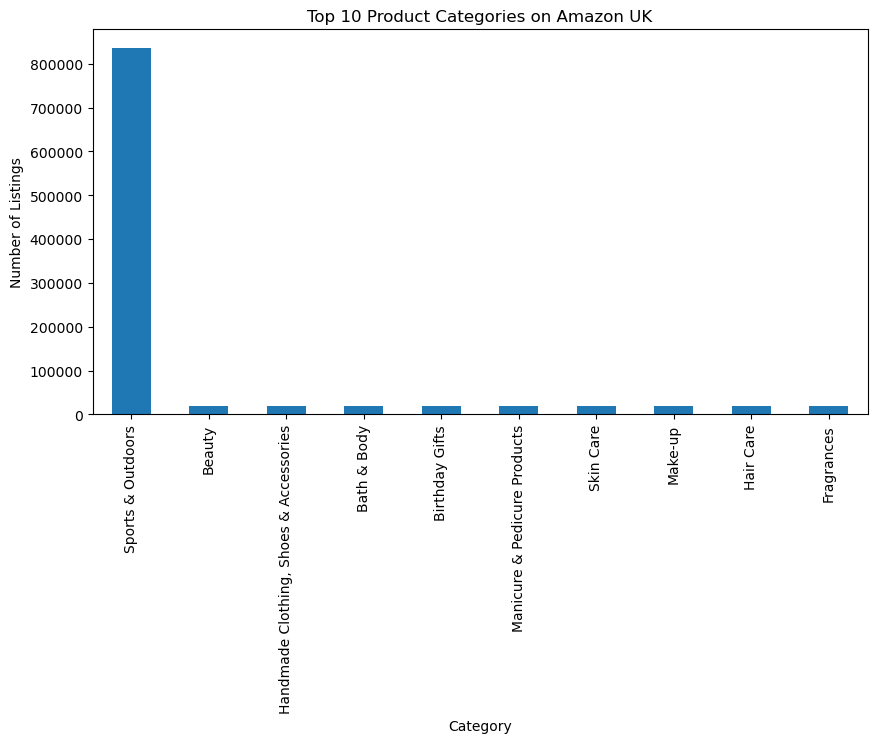

In [8]:
# Step 3 - Bar chart for top 10 categories
category_counts.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Product Categories on Amazon UK")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.show()


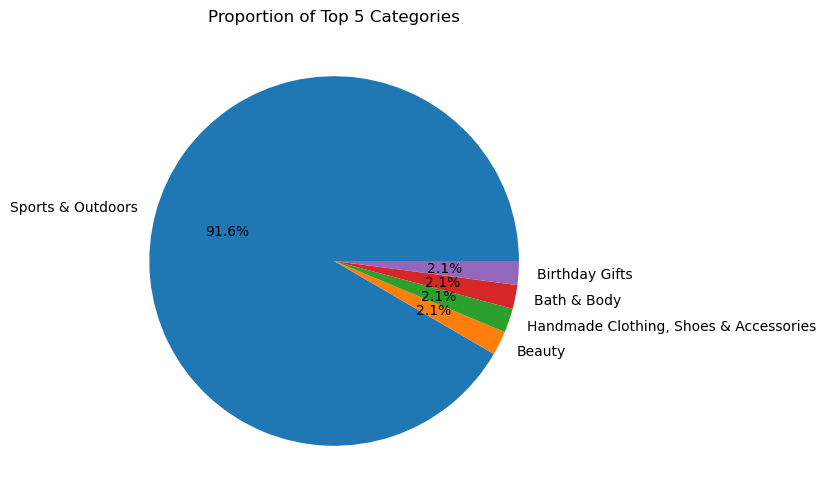

In [9]:
# Step 4 - Pie chart for top 5 categories
category_counts.head(5).plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6)
)
plt.ylabel("")
plt.title("Proportion of Top 5 Categories")
plt.show()


# Part 2: Delving into Product Pricing

In [10]:
# Step 5 - Mean, Median, Mode of price
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()[0]

mean_price, median_price, mode_price


(np.float64(89.24380943923661), 19.09, np.float64(9.99))

In [11]:
# Step 6 - Dispersion metrics
price_range = df["price"].max() - df["price"].min()
price_variance = df["price"].var()
price_std = df["price"].std()
price_iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)

price_range, price_variance, price_std, price_iqr


(100000.0, 119445.48532256528, 345.60886175352226, np.float64(36.0))

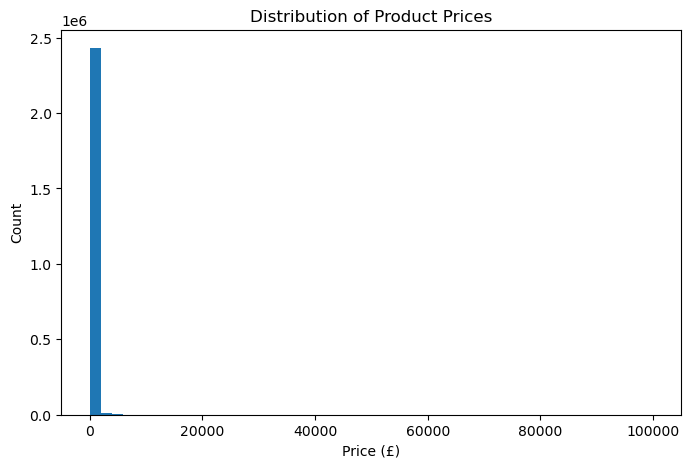

In [12]:
# Step 7 - Histogram of prices
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=50)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()


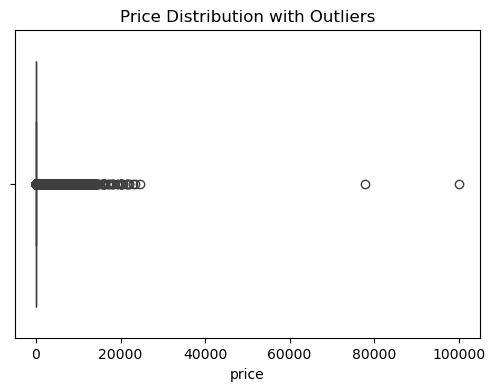

In [13]:
# Step 8 - Boxplot for price
plt.figure(figsize=(6,4))
sns.boxplot(x=df["price"])
plt.title("Price Distribution with Outliers")
plt.show()


# Part 3: Unpacking Product Ratings

In [14]:
# Check the column names: look carefully at the output and find the column that represents product ratings.
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [15]:
# Check the column names: look carefully at the output and find the column that represents product ratings.
print(df.columns.tolist())


['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'category']


In [16]:
# Step 9 - Mean, Median, Mode of ratings
df['stars'].mean(), df['stars'].median(), df['stars'].mode()[0]


(np.float64(2.152836472966066), 0.0, np.float64(0.0))

In [17]:
# Standardize names: rename column
df = df.rename(columns={"stars": "rating"})


In [18]:
# Step 9 - Mean, Median, Mode of ratings
df["rating"].mean(), df["rating"].median(), df["rating"].mode()[0]


(np.float64(2.152836472966066), 0.0, np.float64(0.0))

In [19]:
# Step 10 - Rating dispersion
df["rating"].var(), df["rating"].std(), (
    df["rating"].quantile(0.75) - df["rating"].quantile(0.25)
)


(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [20]:
# Step 11 - Shape of rating distribution
df["rating"].skew(), df["rating"].kurtosis()

# Interpretation:
# - Negative skew → ratings lean high
# - High kurtosis → ratings clustered

(np.float64(0.08120735761080881), np.float64(-1.9260061280432994))

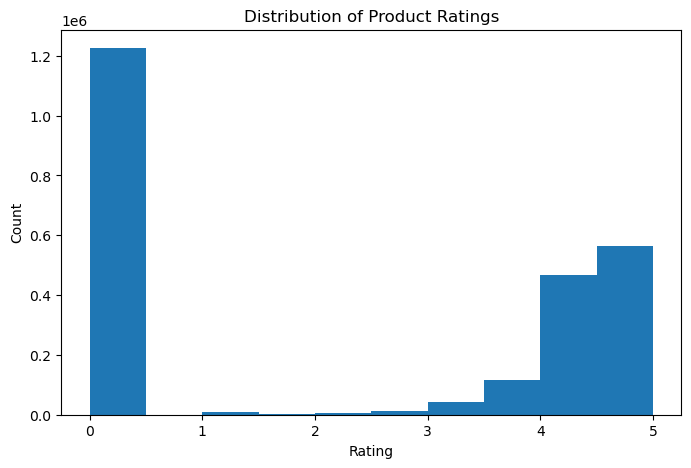

In [21]:
# Step 12 - Rating histogram
plt.figure(figsize=(8,5))
plt.hist(df["rating"], bins=10)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# Final Section — Business Summary (Markdown)

You MUST write this in plain English, for example:

Key Insights

- Most Amazon UK listings belong to a small number of categories.

- Prices show heavy right-skew with significant outliers.

- Ratings are generally high, suggesting positive customer sentiment.

- Premium-priced products exist but represent a smaller share.